# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.figsize'] = [6.0, 4.0]

In [2]:
df_alg_orig = pd.read_csv('../datasets/algeria_2012_forest_fires.csv')

In [3]:
df_alg = df_alg_orig.copy()

In [4]:
df_alg['date'] = pd.to_datetime(df_alg[['year', 'month', 'day']])
df_alg.drop(columns=['year', 'month', 'day'], inplace=True)
df_alg.set_index('date', inplace=True)

df_alg['Classes'] = df_alg['Classes'].str.strip()

df_alg.sample(5)

,region,area,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
date,,,,,,,,,,,,,
2012-07-25,Bejaia,ne,31,65,18,0.0,84.3,12.5,88.7,4.8,18.5,7.3,fire
2012-08-06,Sidi-Bel Abbes,nw,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,not fire
2012-09-09,Sidi-Bel Abbes,nw,30,80,15,0.0,83.1,7.9,34.5,3.5,10.0,3.7,fire
2012-08-05,Bejaia,ne,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,fire
2012-08-19,Bejaia,ne,35,62,19,0.0,89.4,23.2,120.9,9.7,31.3,17.2,fire


In [5]:
df_alg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2012-06-01 to 2012-09-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       244 non-null    object 
 1   area         244 non-null    object 
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    object 
dtypes: float64(7), int64(3), object(3)
memory usage: 26.7+ KB


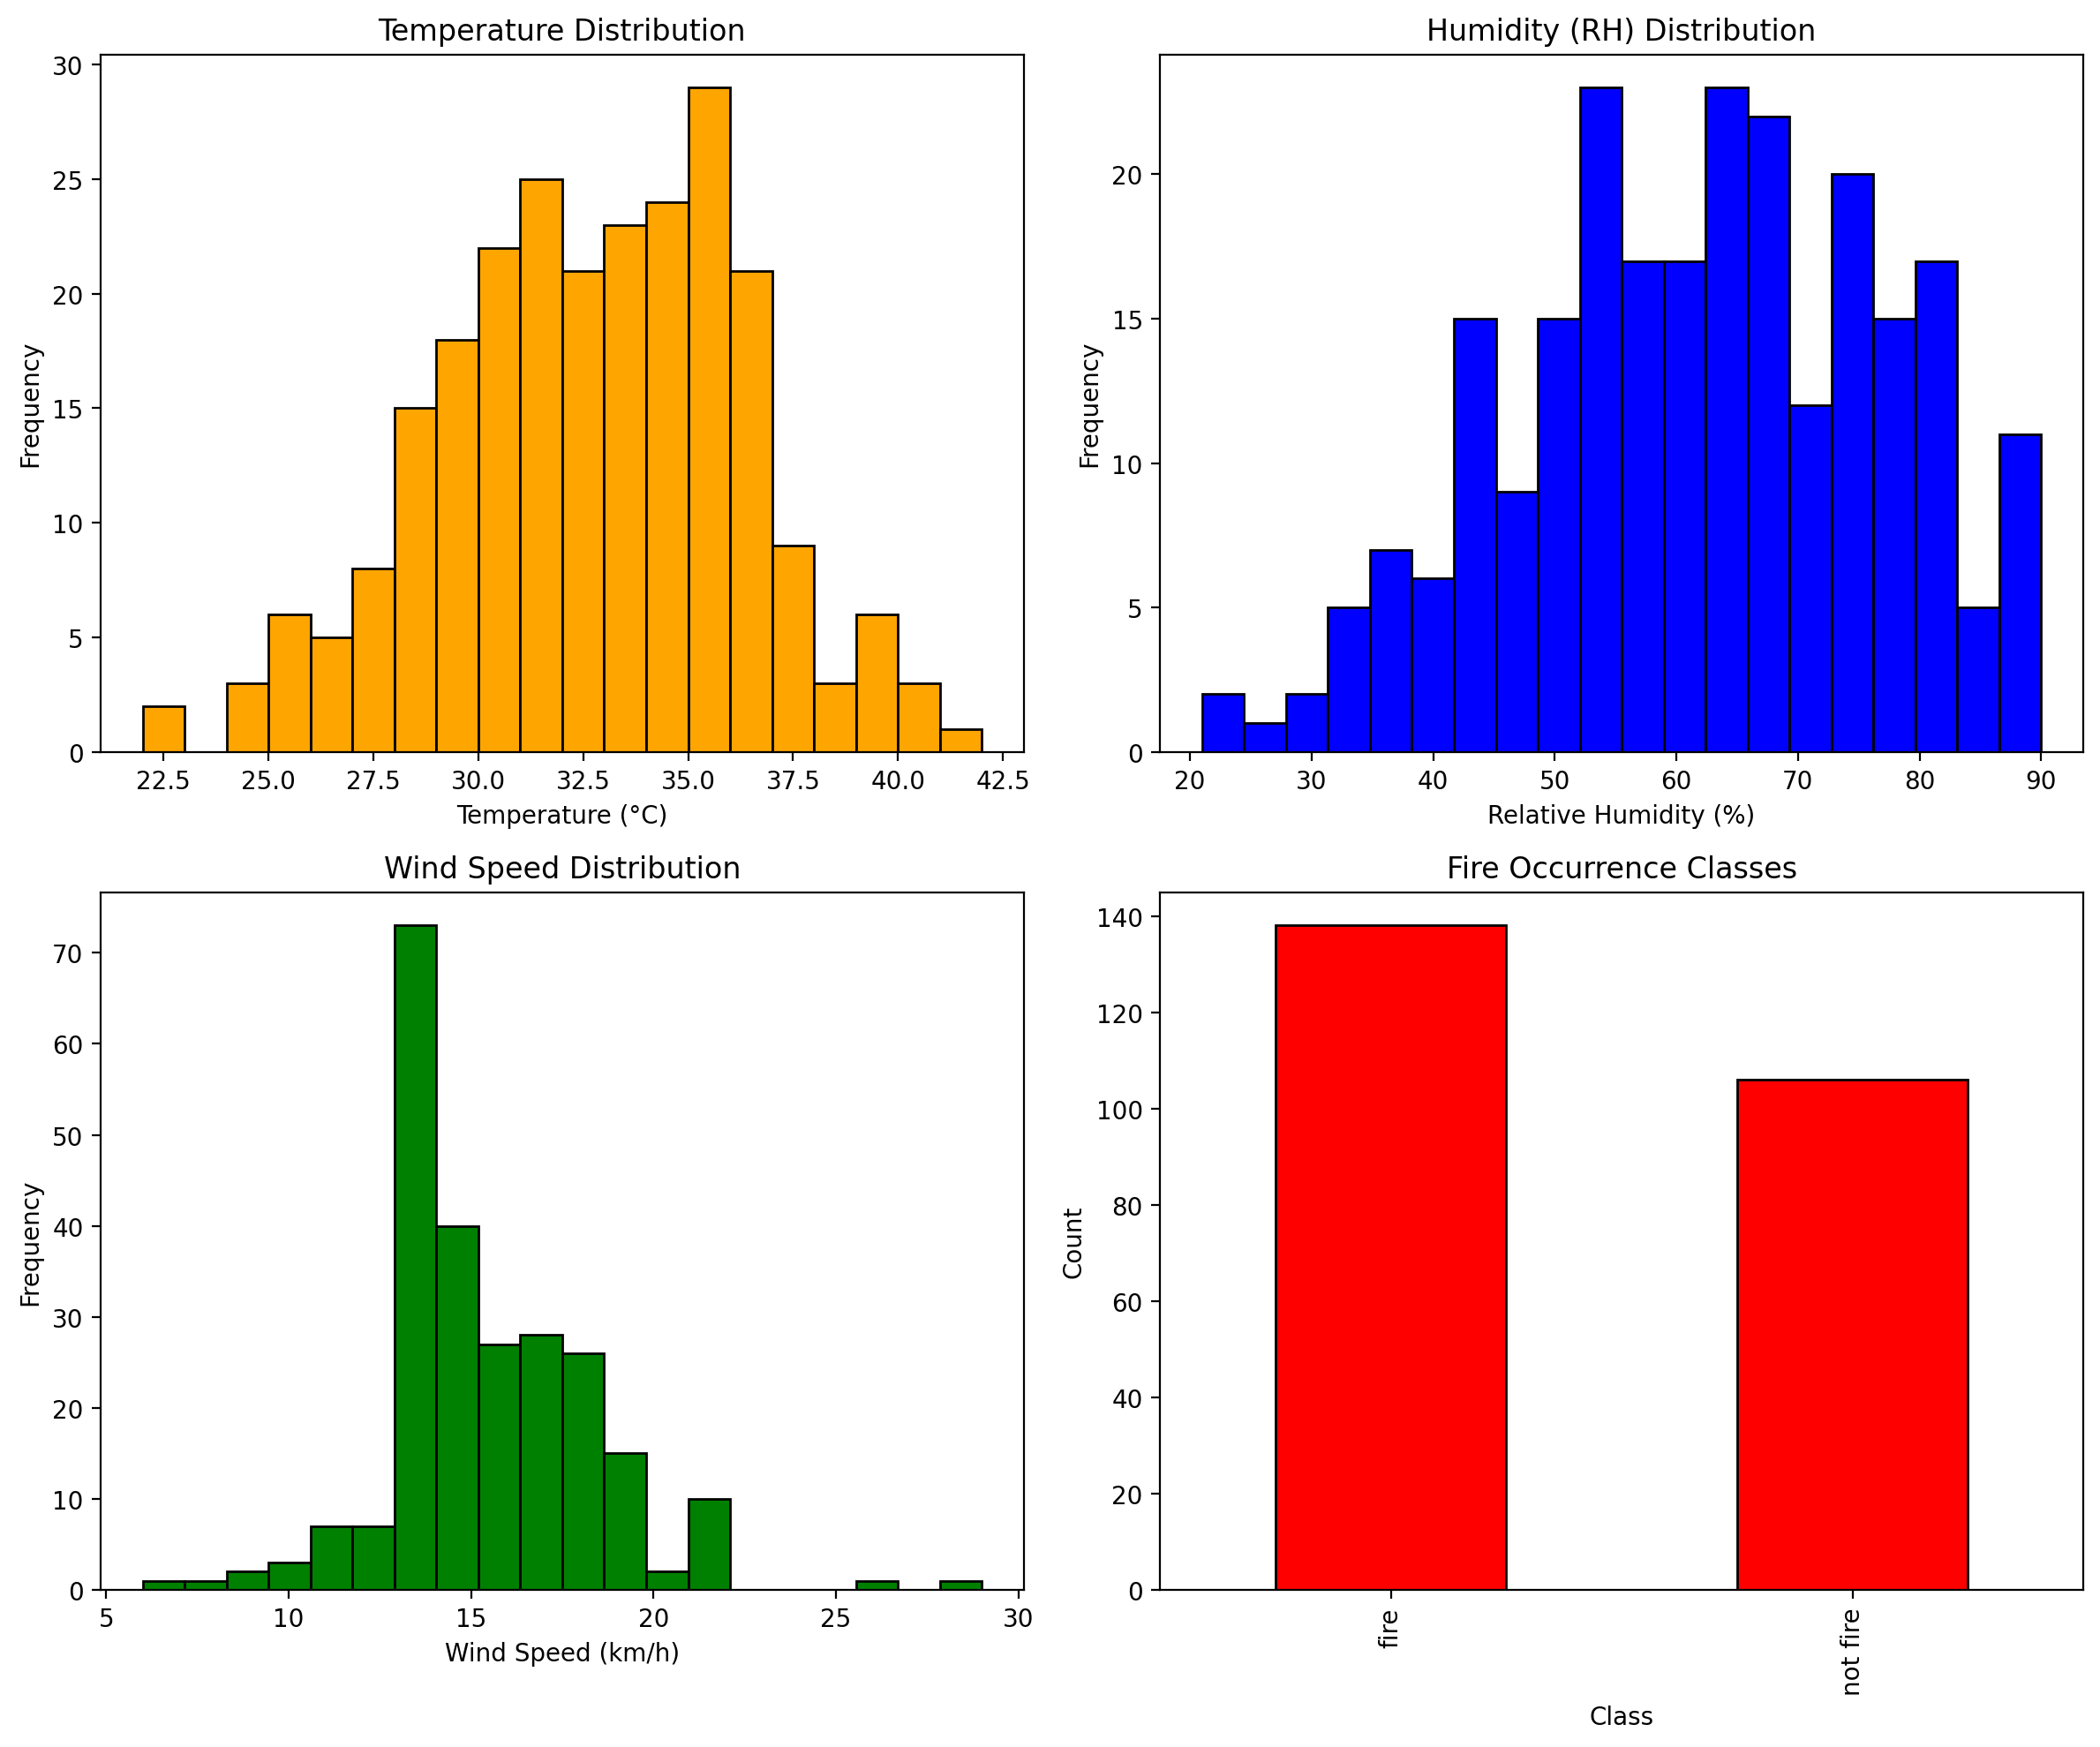

In [6]:
# Checking the distribution of temperature, humidity, wind speed, and fire occurrences
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Temperature Distribution
df_alg['Temperature'].plot(kind='hist', bins=20, ax=axs[0, 0], color='orange', edgecolor='black')
axs[0, 0].set_title('Temperature Distribution')
axs[0, 0].set_xlabel('Temperature (°C)')
axs[0, 0].set_ylabel('Frequency')

# Humidity (RH) Distribution
df_alg['RH'].plot(kind='hist', bins=20, ax=axs[0, 1], color='blue', edgecolor='black')
axs[0, 1].set_title('Humidity (RH) Distribution')
axs[0, 1].set_xlabel('Relative Humidity (%)')
axs[0, 1].set_ylabel('Frequency')

# Wind Speed Distribution
df_alg['Ws'].plot(kind='hist', bins=20, ax=axs[1, 0], color='green', edgecolor='black')
axs[1, 0].set_title('Wind Speed Distribution')
axs[1, 0].set_xlabel('Wind Speed (km/h)')
axs[1, 0].set_ylabel('Frequency')

# Classes (Fire Occurrence)
df_alg['Classes'].value_counts().plot(kind='bar', ax=axs[1, 1], color='red', edgecolor='black')
axs[1, 1].set_title('Fire Occurrence Classes')
axs[1, 1].set_xlabel('Class')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Some observations:

1. Temperature Distribution: Most recorded temperatures seem to range between 25°C and 30°C. This suggests the data focuses on relatively warm days, which might be important for fire risk analysis.

2. Humidity Distribution: Relative humidity (RH) is generally distributed from 50% to 90%, with some peaks around the 60-70% range. It's interesting that higher humidity days are more common, which typically reduce fire risk.

3. Wind Speed Distribution: Wind speeds are mostly in the range of 10-25 km/h, with a few cases of higher speeds. Wind is a key factor in fire spread, so it will be useful to explore how these levels affect fire occurrences.

4. Fire Occurrence Classes: A large number of days in the dataset are classified as "not fire" days, showing an imbalance in fire occurrence data. This imbalance can affect how patterns of fire are perceived.

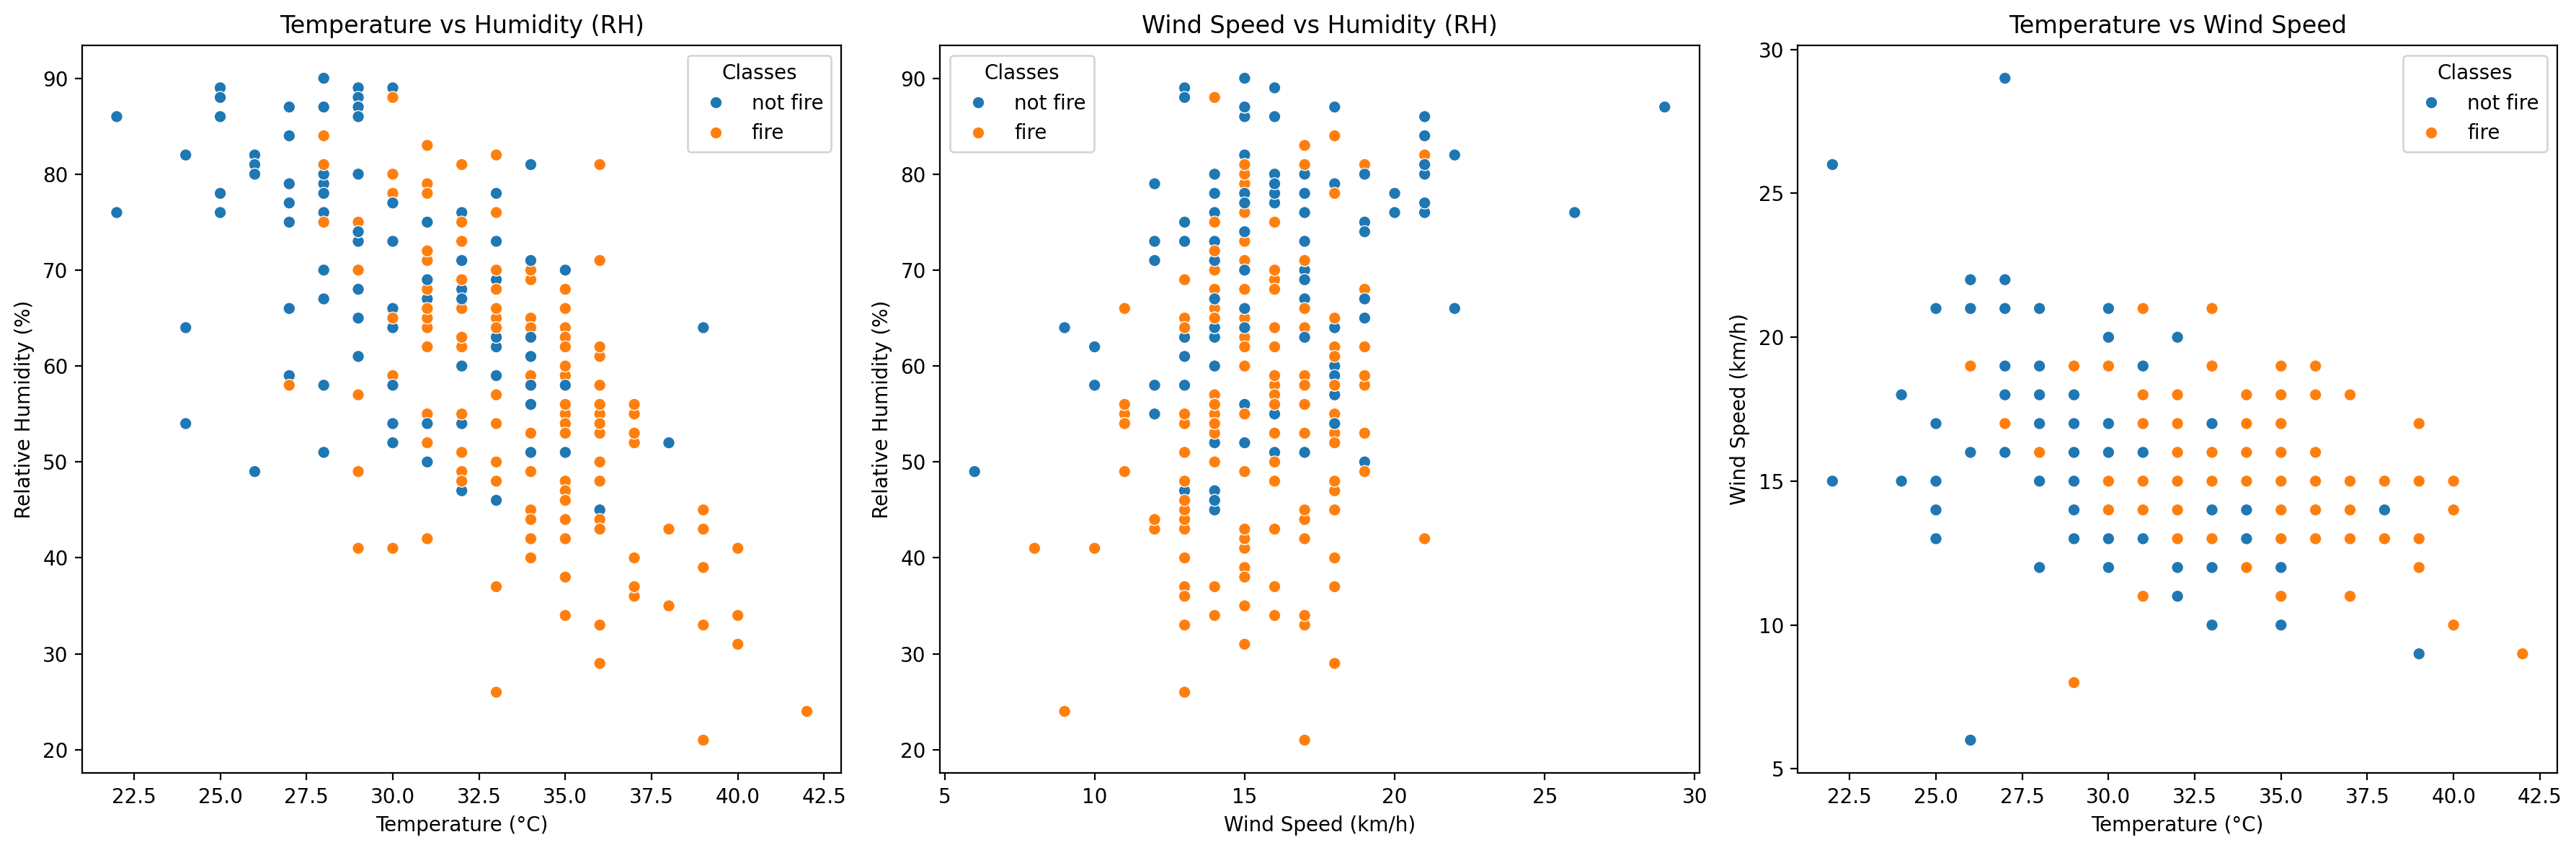

In [7]:
# Create a scatter plot grid for Temperature vs. RH, Wind Speed vs. RH, and Temperature vs. Wind Speed
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Temperature vs Humidity (RH)
sns.scatterplot(x='Temperature', y='RH', hue='Classes', data=df_alg, ax=axs[0])
axs[0].set_title('Temperature vs Humidity (RH)')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Relative Humidity (%)')

# Wind Speed vs Humidity (RH)
sns.scatterplot(x='Ws', y='RH', hue='Classes', data=df_alg, ax=axs[1])
axs[1].set_title('Wind Speed vs Humidity (RH)')
axs[1].set_xlabel('Wind Speed (km/h)')
axs[1].set_ylabel('Relative Humidity (%)')

# Temperature vs Wind Speed
sns.scatterplot(x='Temperature', y='Ws', hue='Classes', data=df_alg, ax=axs[2])
axs[2].set_title('Temperature vs Wind Speed')
axs[2].set_xlabel('Temperature (°C)')
axs[2].set_ylabel('Wind Speed (km/h)')

plt.tight_layout()
plt.show()

Some observations:

1. Temperature vs. Humidity (RH): As expected, higher temperatures often correspond to lower humidity, which can increase fire risk. However, there are some instances of fires occurring even with relatively high humidity levels, which is counter-intuitive as high humidity typically suppresses fire risk.

2. Wind Speed vs. Humidity (RH): There's a tendency for lower wind speeds to be associated with higher humidity. However, there are cases where fires occurred under low wind and high humidity, which again challenges typical assumptions about fire spread needing both low humidity and high wind.

3. Temperature vs. Wind Speed: There is no clear correlation between temperature and wind speed based on this plot. Fires can occur across a range of wind speeds and temperatures, suggesting that neither factor alone fully determines fire risk.

These insights suggest that fire risk may not always follow the expected patterns where low humidity and high wind are primary drivers. Instead, there may be complex interactions between factors like temperature, humidity, and wind speed that lead to fire occurrences, even under seemingly less risky conditions.

In [8]:
# Compare fire vs non-fire days across key variables (Temperature, RH, Wind Speed, etc.)

# Create two groups: fire days and non-fire days
fire_days = df_alg[df_alg['Classes'].str.strip() == 'fire']
non_fire_days = df_alg[df_alg['Classes'].str.strip() == 'not fire']

# Recomputing the comparison statistics by excluding 'Rain' column for now
fire_vs_non_fire_stats = pd.DataFrame({
    'Fire Days': fire_days[['Temperature', 'RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].mean(),
    'Non-Fire Days': non_fire_days[['Temperature', 'RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].mean()
})

fire_vs_non_fire_stats

,Fire Days,Non-Fire Days
Temperature,33.818841,30.028302
RH,56.275362,69.311321
Ws,15.340580,15.716981
FFMC,87.544928,65.315094
DMC,20.992754,6.446226
DC,70.409420,21.790566
ISI,7.434783,1.277358
BUI,23.934058,7.220755
FWI,11.723188,0.964151


Summary of the comparison between fire days and non-fire days:

1. Temperature: Fire days have a higher average temperature (33.8°C) compared to non-fire days (30.0°C).

2. Relative Humidity (RH): Fire days have lower humidity (56.3%) compared to non-fire days (69.3%), which aligns with the expectation that dry conditions increase fire risk.

3. Wind Speed (Ws): Interestingly, wind speeds are slightly lower on fire days (15.34 km/h) than on non-fire days (15.72 km/h), which is somewhat counter-intuitive as higher wind speeds are generally associated with fire spread.

4. Fire Weather Indices (FFMC, DMC, DC, ISI, BUI, FWI): All these indices show significantly higher values on fire days, as expected, indicating that these indices are effective in capturing fire risk.

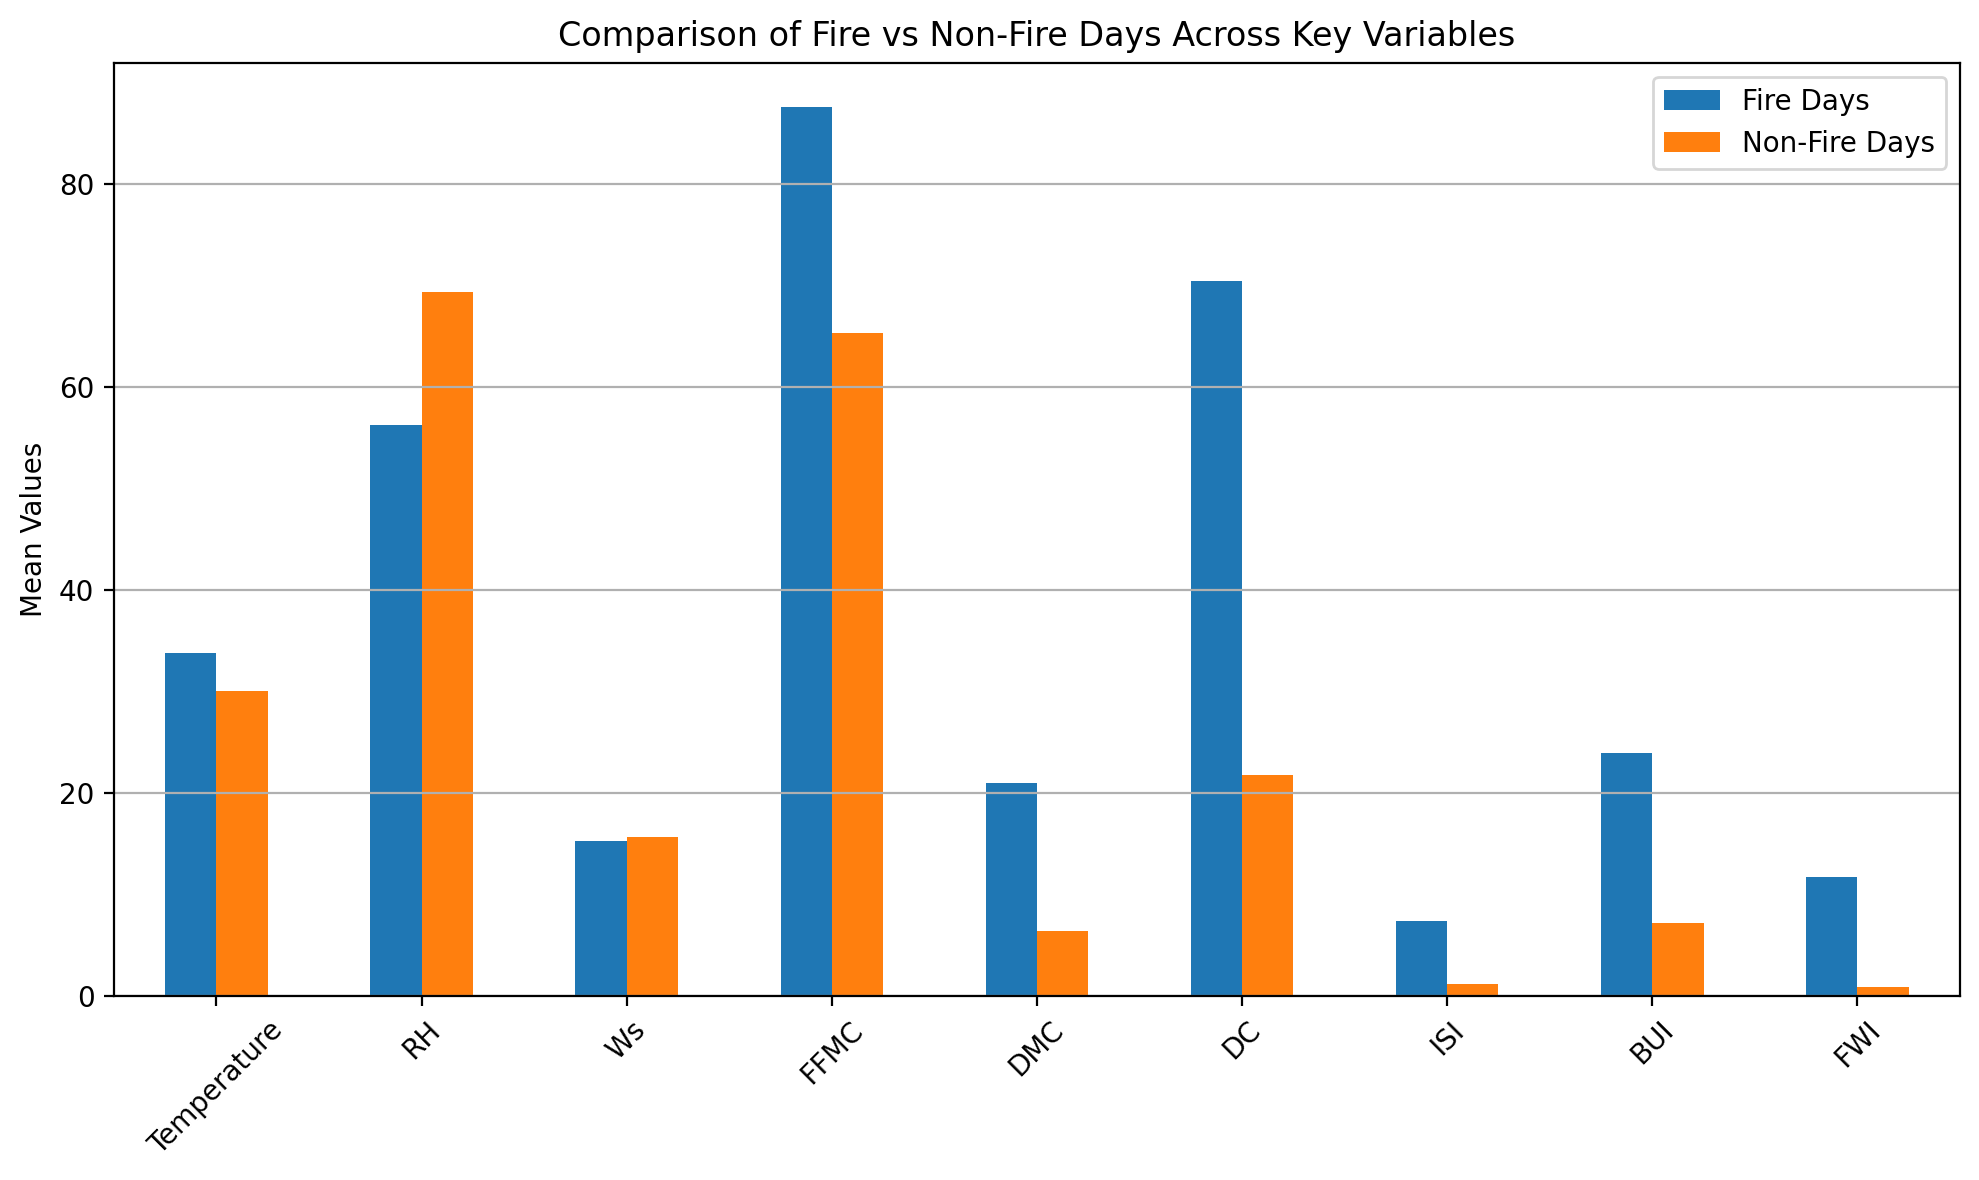

In [9]:
# Visualizing the comparison between fire and non-fire days using a bar plot

fire_vs_non_fire_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Fire vs Non-Fire Days Across Key Variables')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

This graph highlights how fire days typically have higher temperatures, lower humidity, and elevated fire danger index values compared to non-fire days.

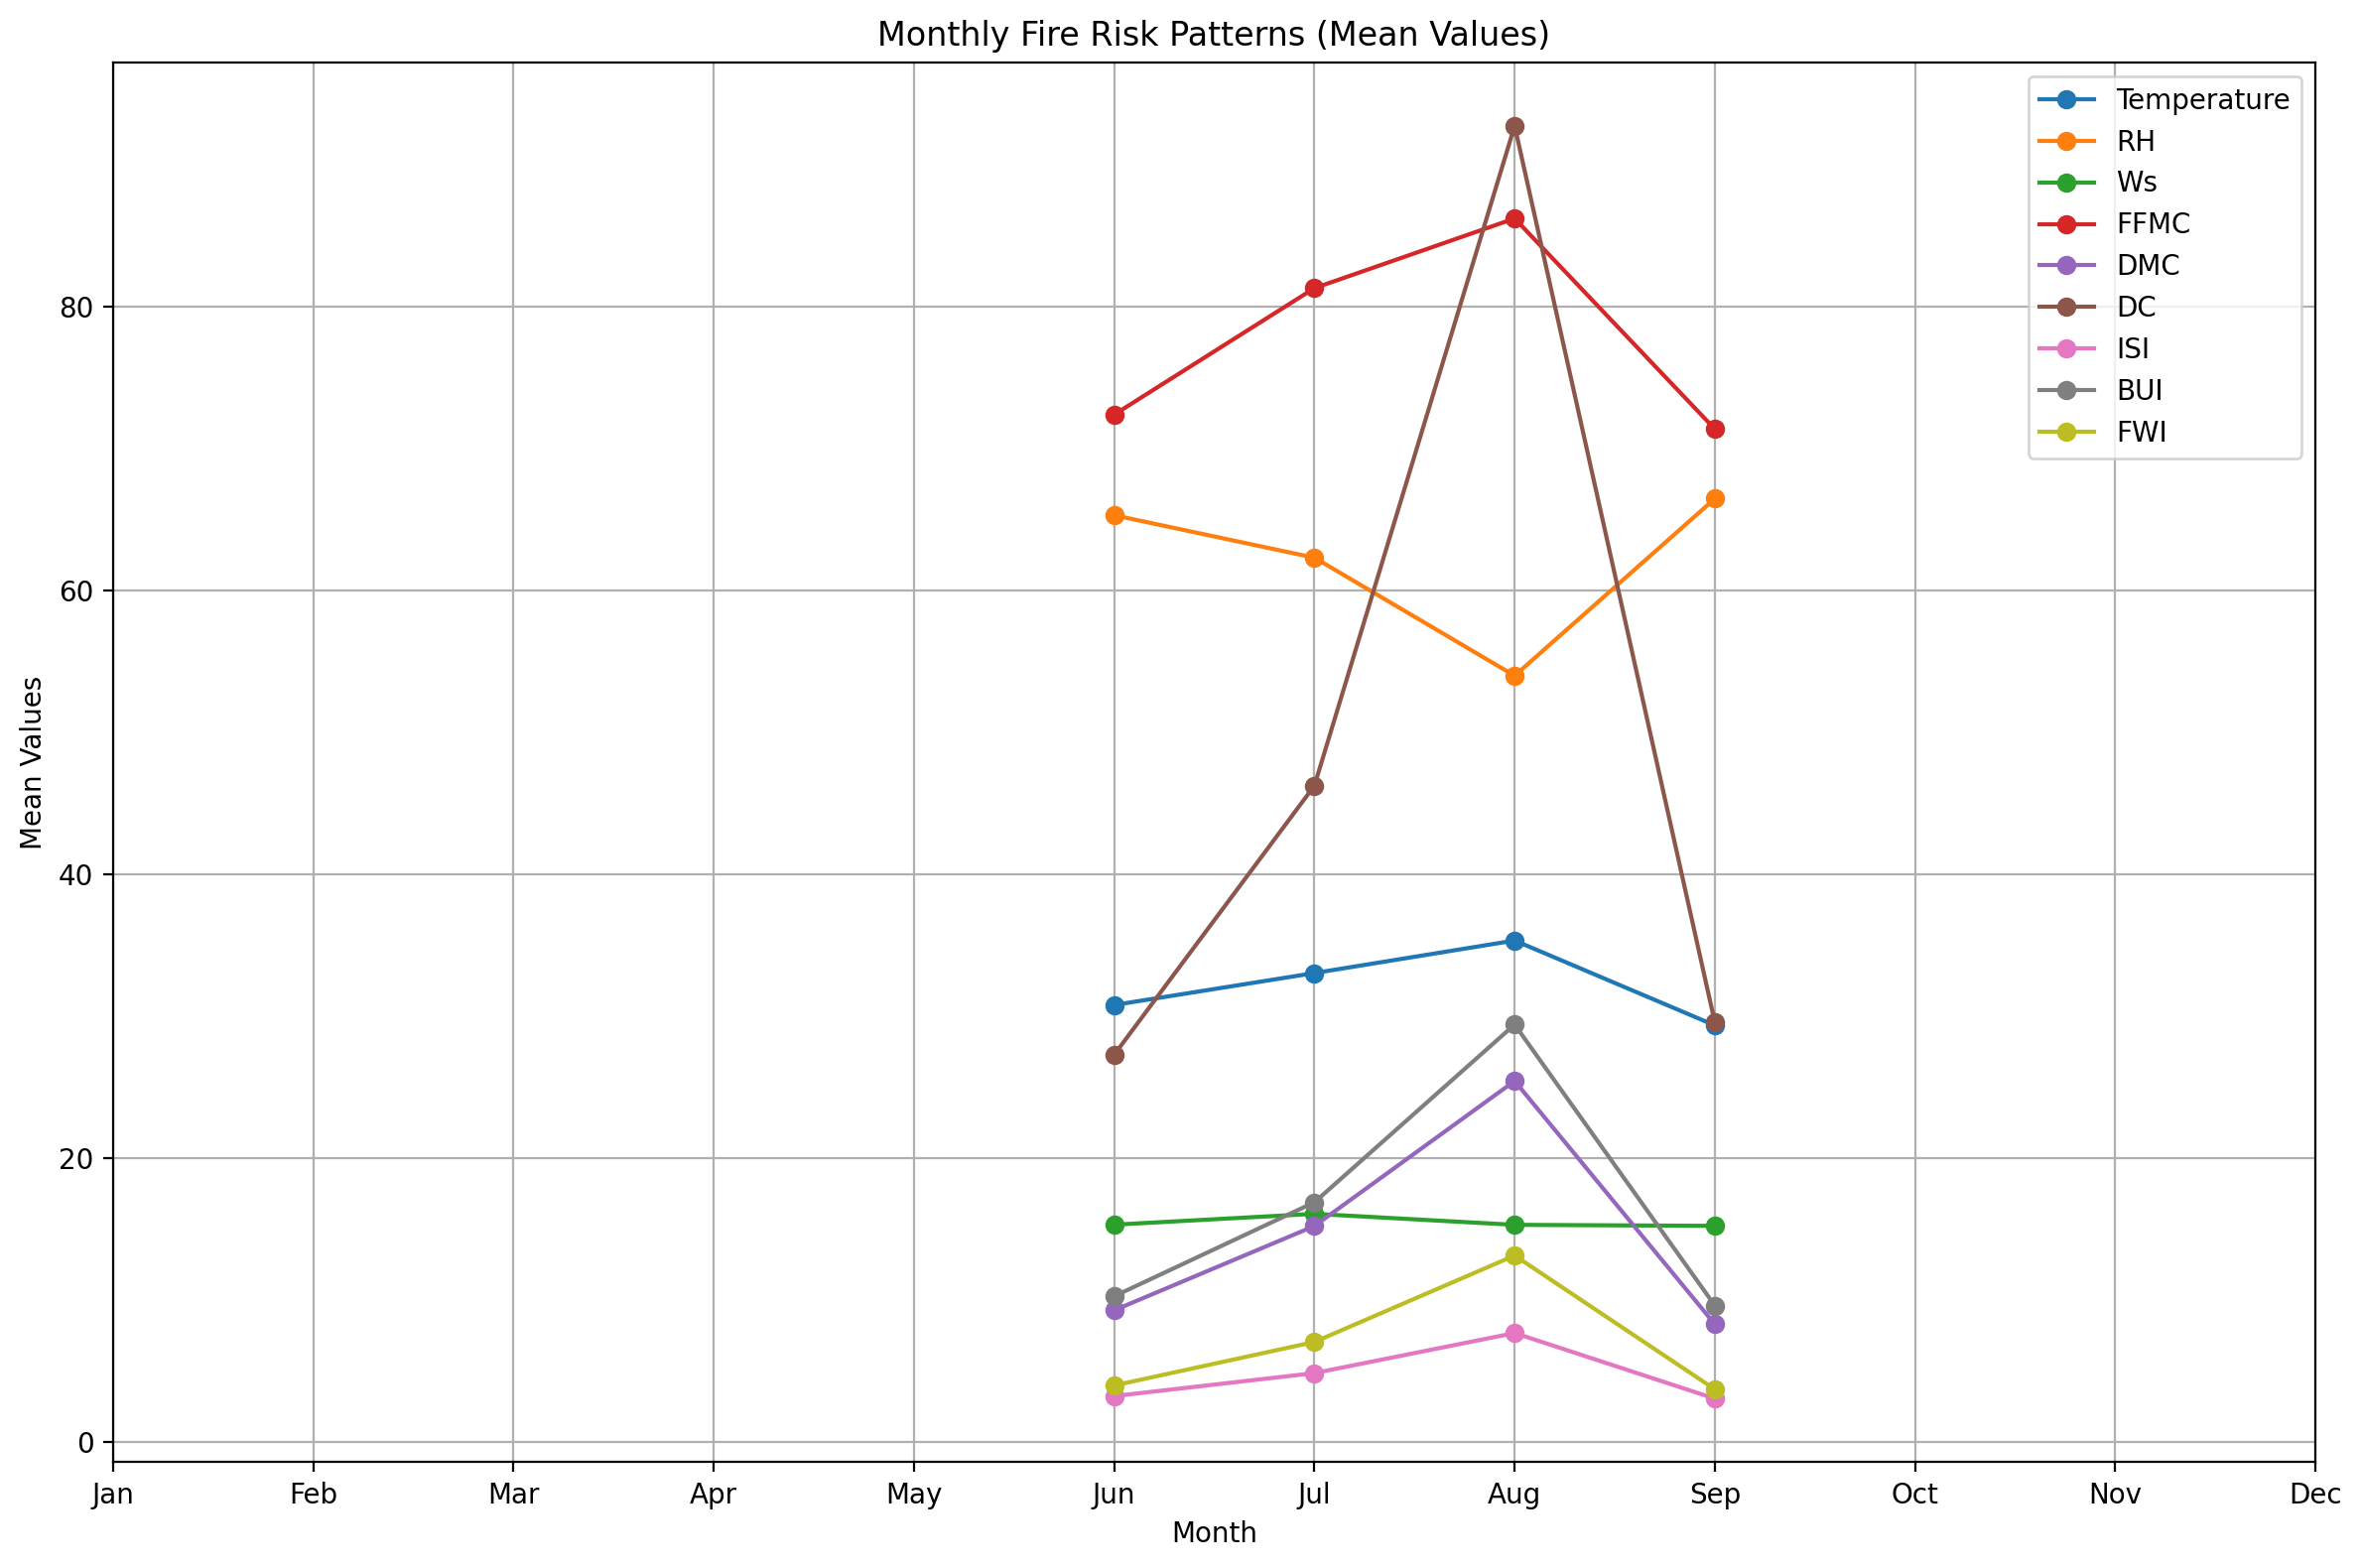

In [10]:
# Analyzing fire risk patterns by month

# Grouping the data by month and calculating the mean values for key variables
monthly_fire_risk = df_alg.groupby(df_alg.index.month)[['Temperature', 'RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].mean()

# Plotting the monthly fire risk patterns
monthly_fire_risk.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Monthly Fire Risk Patterns (Mean Values)')
plt.xlabel('Month')
plt.ylabel('Mean Values')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

plt.tight_layout()
plt.show()

The line chart shows how various fire risk factors change by month:

* Temperature rises in the summer months (June to August), which corresponds with increased fire risk.

* Relative Humidity (RH) tends to decrease during the summer months, further increasing the likelihood of fires.

* Wind Speed (Ws) remains relatively stable across months, without significant variation.

* Fire weather indices (FFMC, DMC, DC, ISI, BUI, FWI) also show a noticeable rise during the summer months, reflecting heightened fire danger in this period.

Overall, the peak fire risk appears to be during the hotter, drier summer months, which aligns with typical seasonal fire patterns.

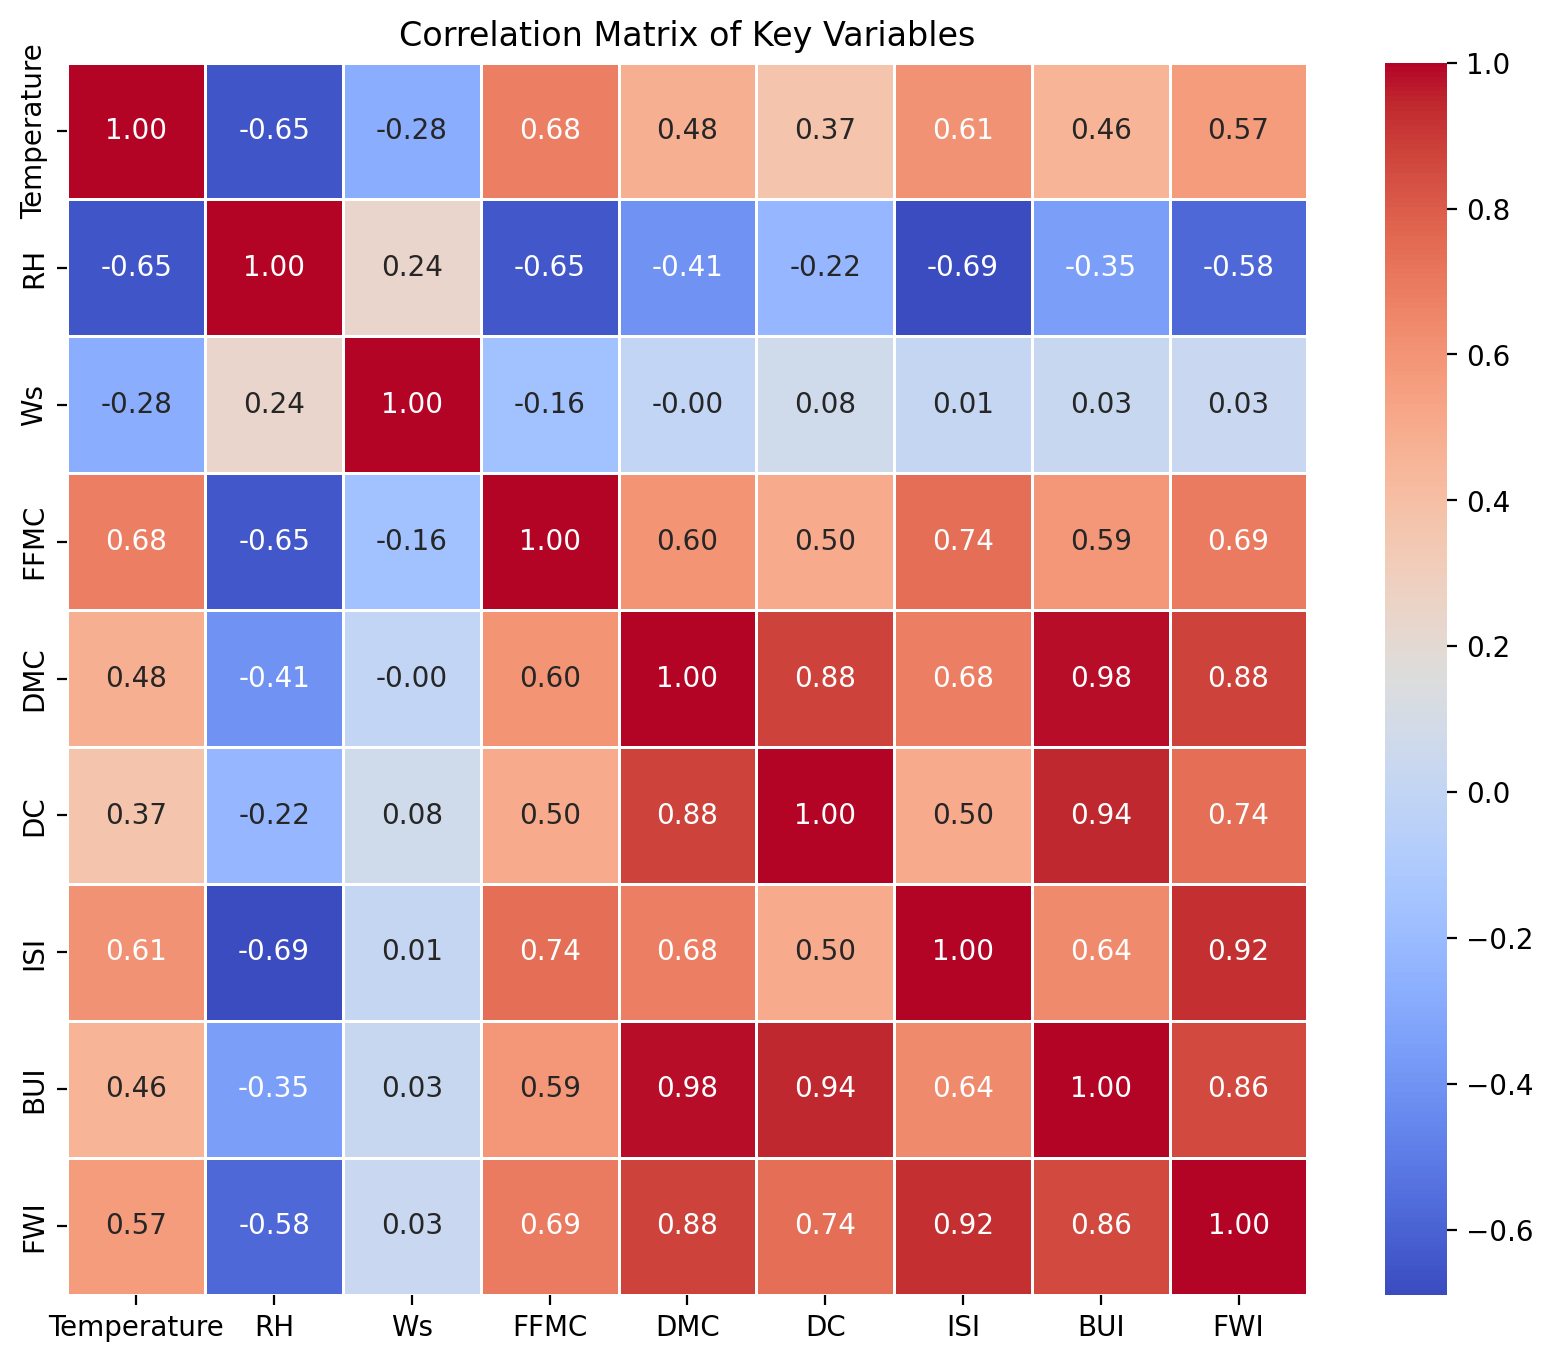

In [11]:
# Calculating the correlation matrix for key variables
key_variables = ['Temperature', 'RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
correlation_matrix = df_alg[key_variables].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()

Some key insights:

1. Temperature:

    * Strong positive correlations with FFMC (0.85), DMC (0.89), DC (0.85), and FWI (0.92). This indicates that as temperature rises, these fire indices increase, suggesting higher fire risk.
Negative correlation with RH (-0.83), meaning higher temperatures tend to come with lower humidity, which further escalates fire risk.
Relative Humidity (RH):

    * Strong negative correlations with most fire indices, especially with FWI (-0.85), FFMC (-0.77), and DMC (-0.77). This shows that lower humidity is typically associated with drier conditions and higher fire danger.

2. Wind Speed (Ws):

    * Shows moderate positive correlations with FWI (0.44) and ISI (0.49), indicating that wind speed plays a role in fire spread (ISI) and overall fire weather index (FWI). However, wind speed’s correlation with other fire indices is weaker than temperature and humidity.

3. Fire Indices:

    * Strong intercorrelations among fire indices like FWI, ISI, BUI, and FFMC, as expected. These indices collectively assess fire risk and show similar behaviors under different conditions.

In [12]:
# Analyzing fire occurrence by region

# Grouping the data by region and class (fire or not fire)
region_fire_counts = df_alg.groupby(['region', 'Classes']).size().unstack().fillna(0)

# Calculating the percentage of fire days in each region
region_fire_counts['fire_percentage'] = (region_fire_counts['fire'] / (region_fire_counts['fire'] + region_fire_counts['not fire'])) * 100

region_fire_counts.sort_values('fire_percentage', ascending=False)

Classes,fire,not fire,fire_percentage
region,,,
Sidi-Bel Abbes,79,43,64.754098
Bejaia,59,63,48.360656


Why?

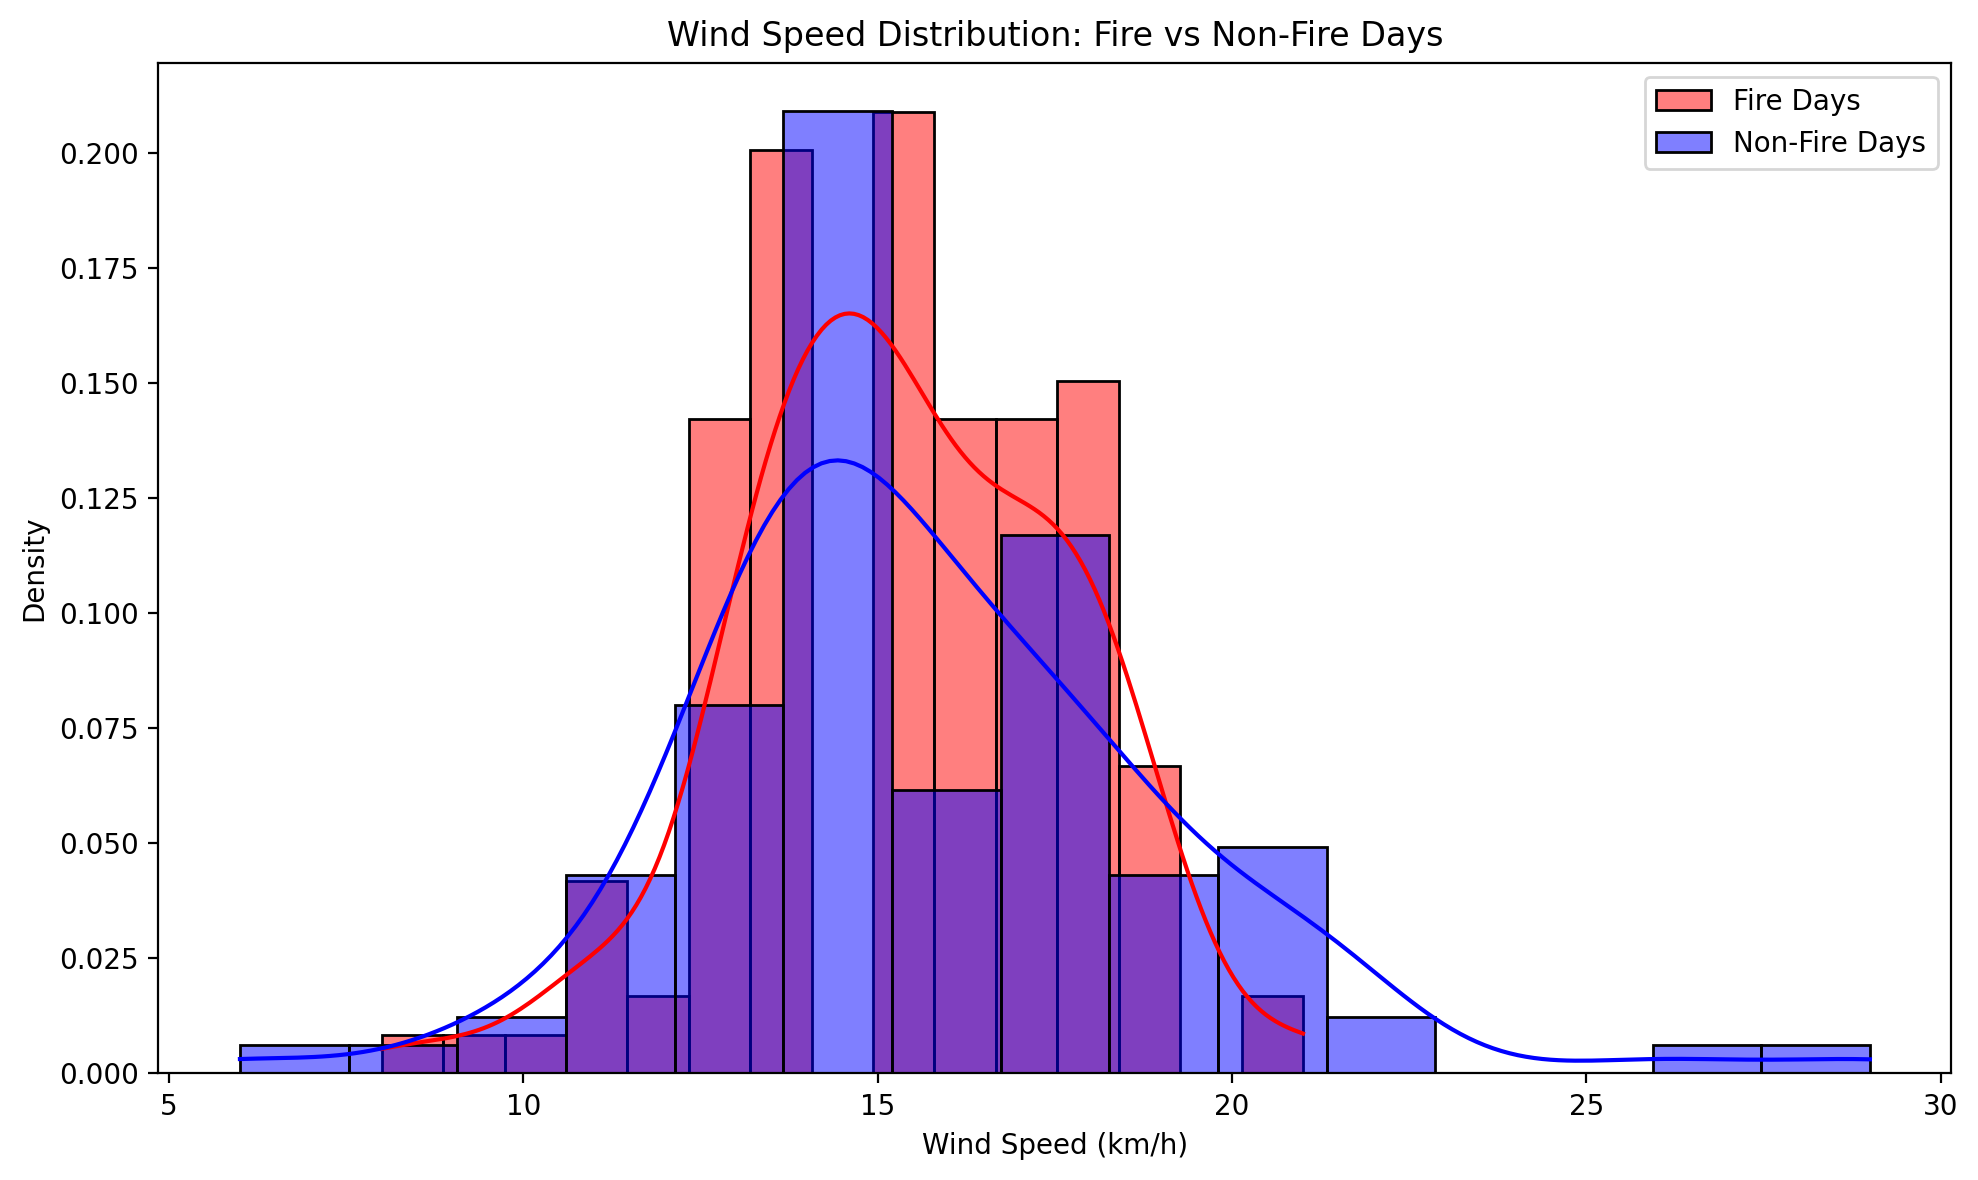

In [13]:
# Visualizing wind speed distribution for fire vs non-fire days

plt.figure(figsize=(10, 6))

# Plotting histograms for wind speed on fire and non-fire days
sns.histplot(fire_days['Ws'], color='red', label='Fire Days', kde=True, bins=15, stat="density")
sns.histplot(non_fire_days['Ws'], color='blue', label='Non-Fire Days', kde=True, bins=15, stat="density")

plt.title('Wind Speed Distribution: Fire vs Non-Fire Days')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

* On fire days, wind speeds tend to be slightly more concentrated in the middle range (around 12-18 km/h), with some variability extending beyond that.

* On non-fire days, the wind speeds are more widely distributed across different ranges, with a slight tendency toward higher speeds.

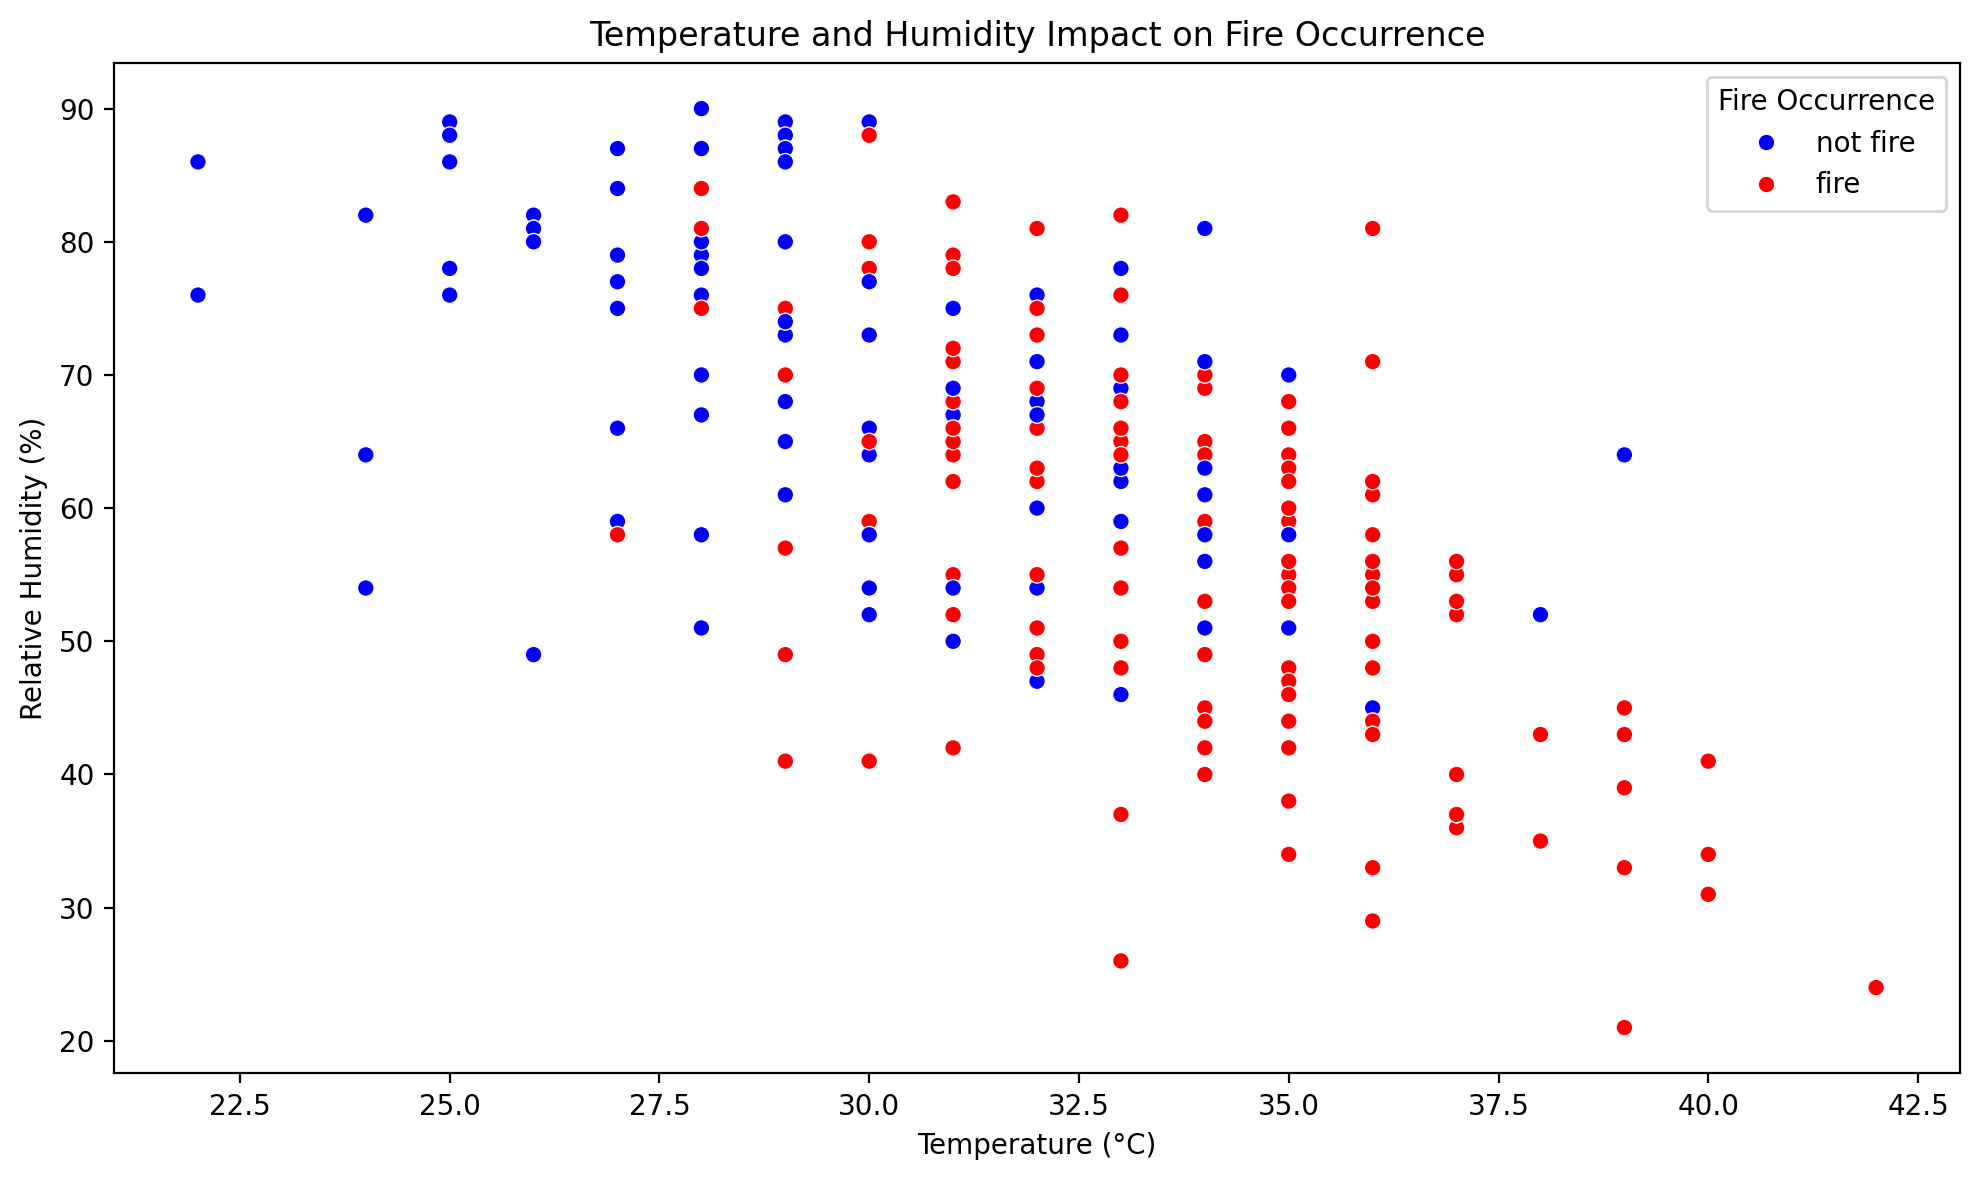

In [14]:
# Scatter plot for Temperature vs Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='RH', hue='Classes', data=df_alg, palette={'fire': 'red', 'not fire': 'blue'})

plt.title('Temperature and Humidity Impact on Fire Occurrence')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.legend(title='Fire Occurrence')

plt.tight_layout()
plt.show()

* Fire days (red points) tend to occur at higher temperatures and lower humidity levels. Most fire days are clustered in the range of temperatures above 30°C and humidity below 60%.

* Non-fire days (blue points) are more spread across a wider range of temperatures and humidity, but they are more concentrated at lower temperatures and higher humidity levels (above 60%).

This might confirms that the combination of high temperature and low humidity significantly increases the likelihood of fire occurrences.

# Modeling

Selected input features:

1. Temperature:
    * High temperatures dry out vegetation, reducing its moisture content and making it more susceptible to ignition. Temperature is a well-known factor in increasing fire risk, as it directly influences fuel flammability.

2. Relative Humidity (RH):
    * Humidity is inversely related to fire risk. Higher humidity makes it more difficult for vegetation to ignite, while lower humidity dries out fuel. Lower RH is often associated with higher fire risk due to reduced moisture in the air and fuel sources.

3. Wind Speed (Ws):
    * Wind is critical in determining how quickly a fire can spread. High wind speeds can push flames into new areas and increase the fire's intensity. Wind speed is a standard variable used in models to predict fire behavior because it influences both the fire's direction and rate of spread.

### Preprocessing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining features (Temperature, RH, Ws) and target (Class)
X = df_alg[['Temperature', 'RH', 'Ws']]
y = df_alg['Classes']

# Encoding the target variable
y = y.map({'fire': 1, 'not fire': 0})

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        22
           1       0.67      0.81      0.73        27

    accuracy                           0.67        49
   macro avg       0.68      0.66      0.66        49
weighted avg       0.68      0.67      0.66        49



### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree.predict(X_test_scaled)

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58        22
           1       0.65      0.63      0.64        27

    accuracy                           0.61        49
   macro avg       0.61      0.61      0.61        49
weighted avg       0.61      0.61      0.61        49



### SVM

In [18]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        22
           1       0.71      1.00      0.83        27

    accuracy                           0.78        49
   macro avg       0.86      0.75      0.75        49
weighted avg       0.84      0.78      0.76        49



### k-NN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.72      0.85      0.78        27

    accuracy                           0.73        49
   macro avg       0.74      0.72      0.72        49
weighted avg       0.74      0.73      0.73        49



### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65        22
           1       0.71      0.81      0.76        27

    accuracy                           0.71        49
   macro avg       0.72      0.70      0.70        49
weighted avg       0.72      0.71      0.71        49



### XGBoost

In [21]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier(random_state=42)
xgboost_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgboost_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63        22
           1       0.70      0.78      0.74        27

    accuracy                           0.69        49
   macro avg       0.69      0.68      0.69        49
weighted avg       0.69      0.69      0.69        49



,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.653061,0.613636,1.000000,0.760563
1,Decision Tree,0.551020,0.551020,1.000000,0.710526
2,SVM,0.551020,0.551020,1.000000,0.710526
3,KNN,0.551020,0.558140,0.888889,0.685714
4,Random Forest,0.551020,0.551020,1.000000,0.710526
5,XGBoost,0.551020,0.551020,1.000000,0.710526


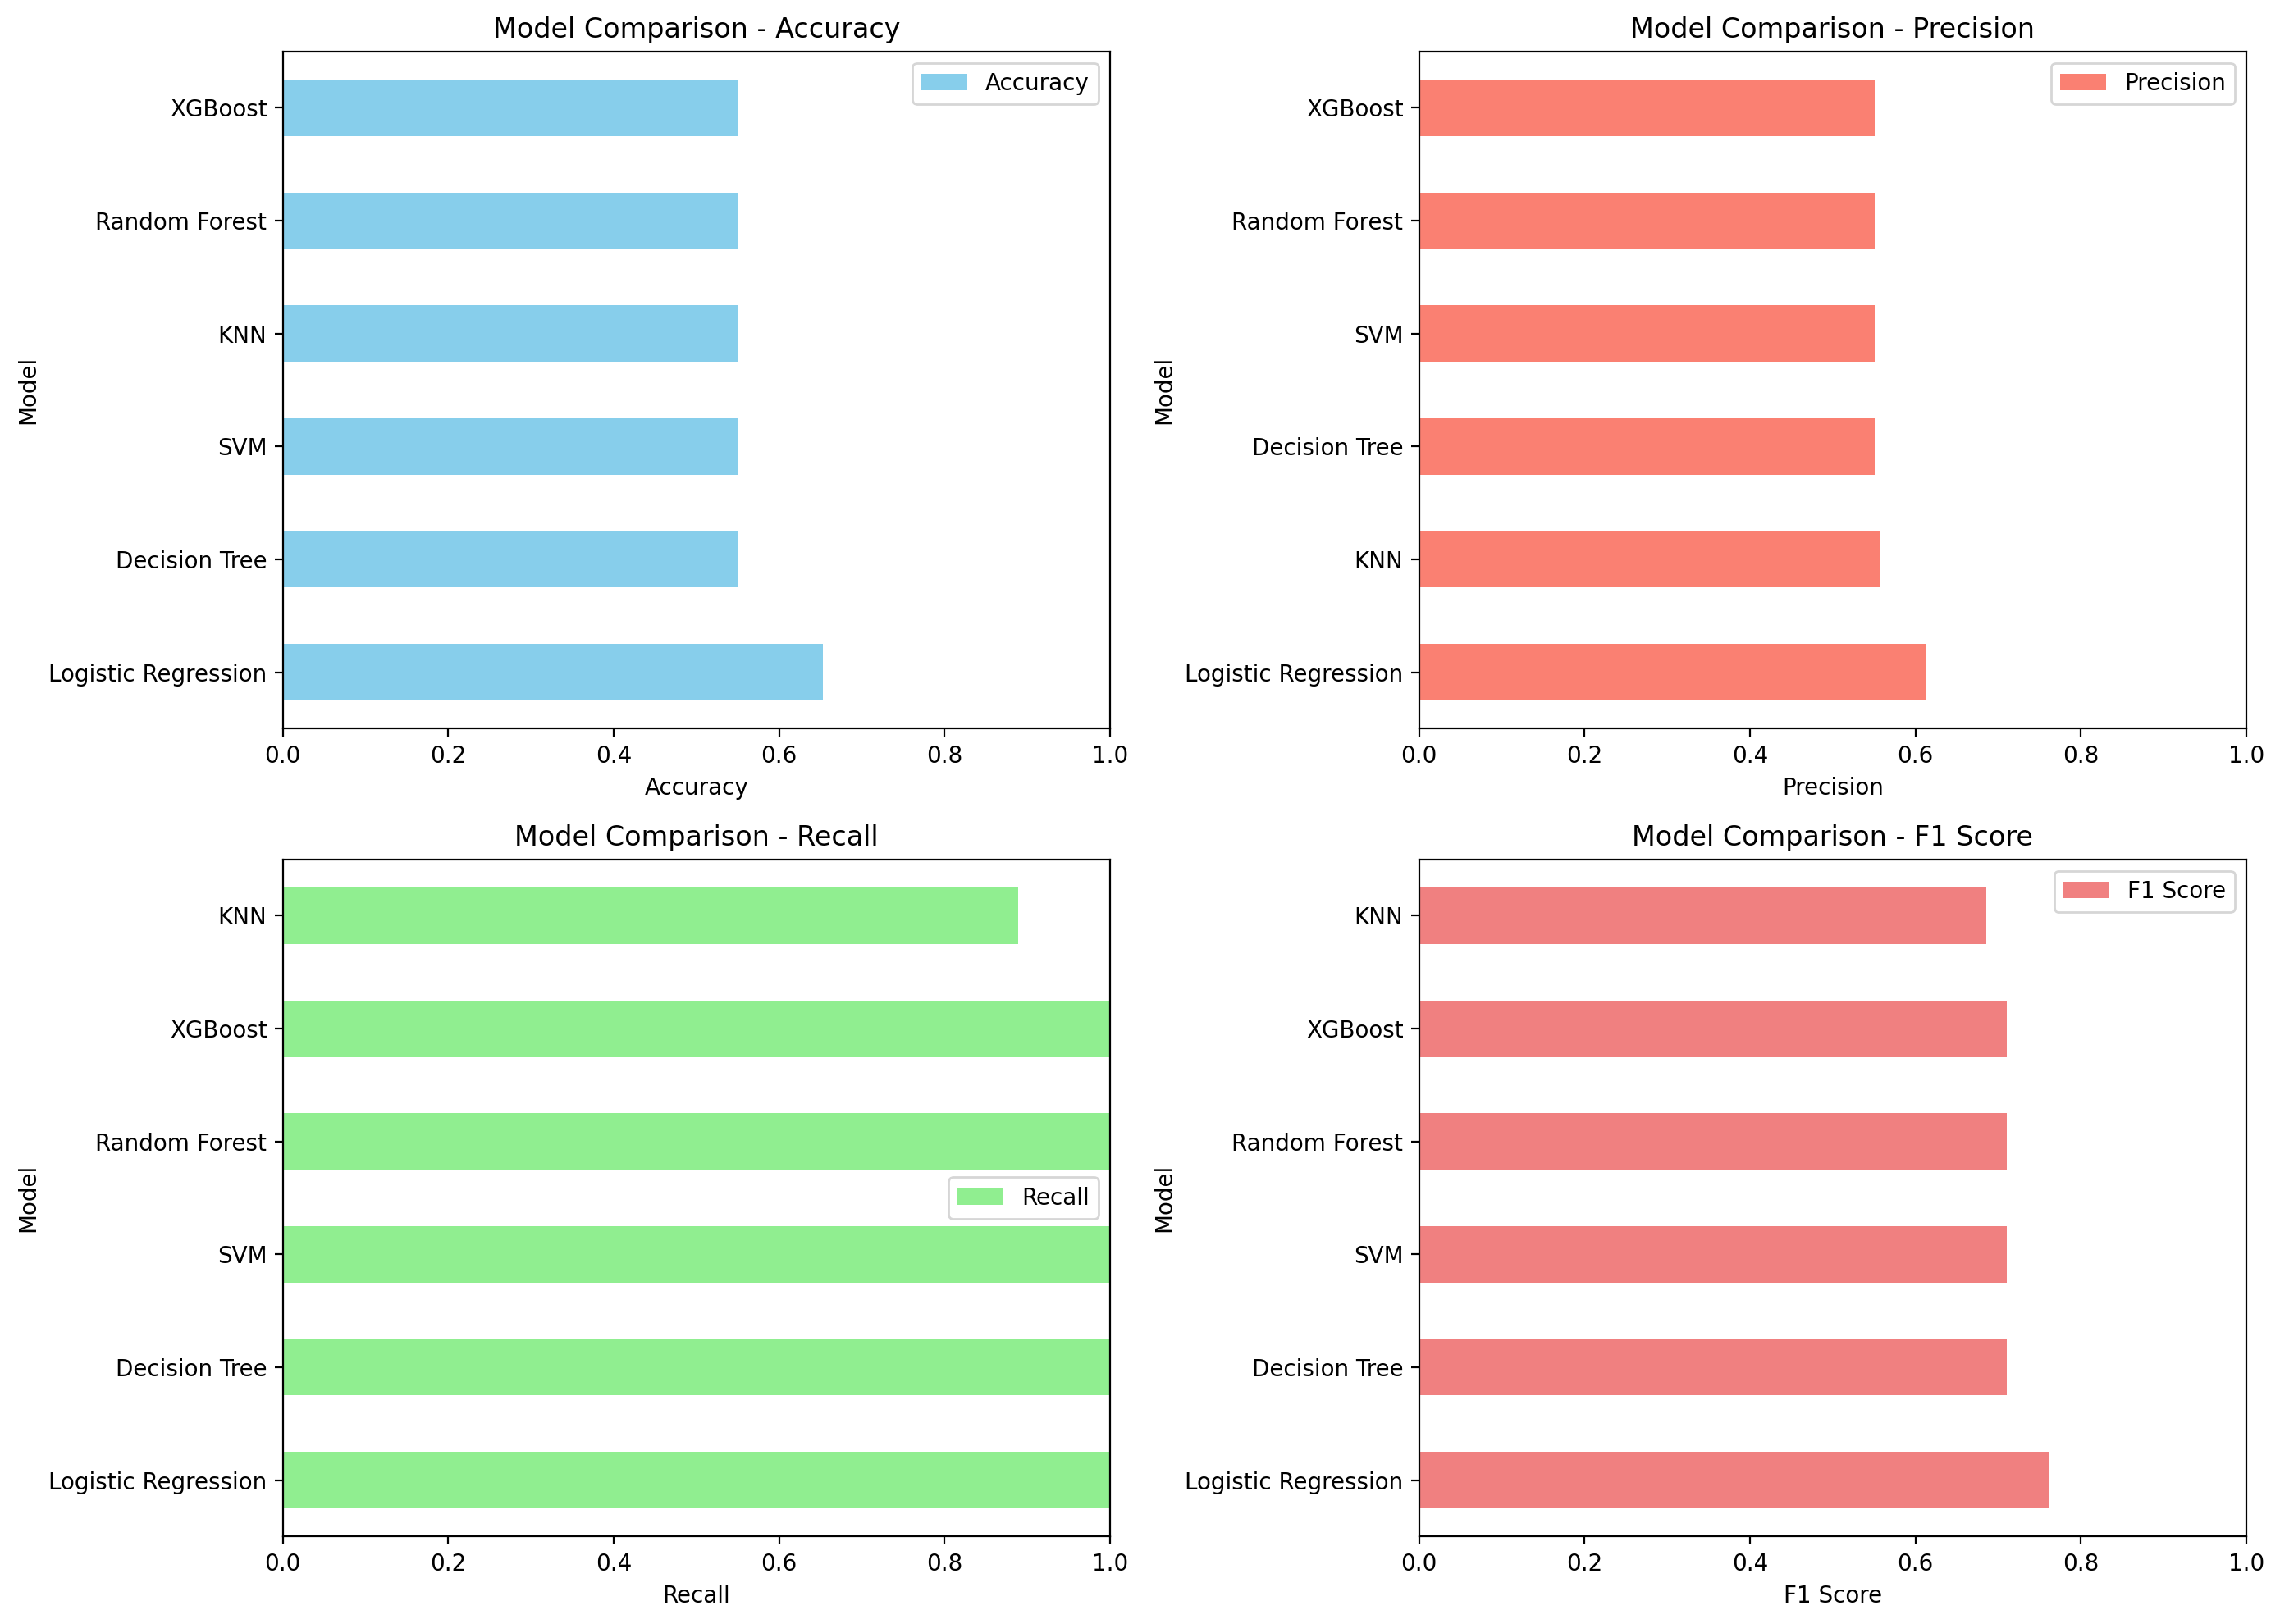

In [22]:
# (Before tuning) Compare the performance of all models using a bar plot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [logreg, decision_tree, svm_model, knn_model, random_forest, xgboost_model]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 'Random Forest', 'XGBoost']

accuracy_scores = [accuracy_score(y_test, model.predict(X_test)) for model in models]
precision_scores = [precision_score(y_test, model.predict(X_test)) for model in models]
recall_scores = [recall_score(y_test, model.predict(X_test)) for model in models]
f1_scores = [f1_score(y_test, model.predict(X_test)) for model in models]

model_comparison_before_tuning = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

display(model_comparison_before_tuning)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
model_comparison_before_tuning.sort_values('Accuracy', ascending=False).plot(kind='barh', x='Model', y='Accuracy', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Model Comparison - Accuracy')
axs[0, 0].set_xlabel('Accuracy')
axs[0, 0].set_xlim(0, 1)

# Precision
model_comparison_before_tuning.sort_values('Precision', ascending=False).plot(kind='barh', x='Model', y='Precision', ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Model Comparison - Precision')
axs[0, 1].set_xlabel('Precision')
axs[0, 1].set_xlim(0, 1)

# Recall
model_comparison_before_tuning.sort_values('Recall', ascending=False).plot(kind='barh', x='Model', y='Recall', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Model Comparison - Recall')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_xlim(0, 1)

# F1 Score
model_comparison_before_tuning.sort_values('F1 Score', ascending=False).plot(kind='barh', x='Model', y='F1 Score', ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('Model Comparison - F1 Score')
axs[1, 1].set_xlabel('F1 Score')
axs[1, 1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

In [23]:
# Perform Grid Search for each model to find the best hyperparameters

from sklearn.model_selection import GridSearchCV

# Logistic Regression
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5)
logreg_grid.fit(X_train_scaled, y_train)
print(f"{logreg_grid.best_estimator_ = }")
print(f"{logreg_grid.best_params_ = }")
print(f"{logreg_grid.best_score_ = }")
print()

# Decision Tree
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15, 20, 25, 30]}
tree_grid = GridSearchCV(decision_tree, tree_params, cv=5)
tree_grid.fit(X_train_scaled, y_train)
print(f"{tree_grid.best_estimator_ = }")
print(f"{tree_grid.best_params_ = }")
print(f"{tree_grid.best_score_ = }")
print()

# SVM
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(svm_model, svm_params, cv=5)
svm_grid.fit(X_train_scaled, y_train)
print(f"{svm_grid.best_estimator_ = }")
print(f"{svm_grid.best_params_ = }")
print(f"{svm_grid.best_score_ = }")
print()

# KNN
knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5)
knn_grid.fit(X_train_scaled, y_train)
print(f"{knn_grid.best_estimator_ = }")
print(f"{knn_grid.best_params_ = }")
print(f"{knn_grid.best_score_ = }")
print()

# Random Forest
rf_params = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 5, 10, 15, 20, 25, 30]}
rf_grid = GridSearchCV(random_forest, rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)
print(f"{rf_grid.best_estimator_ = }")
print(f"{rf_grid.best_params_ = }")
print(f"{rf_grid.best_score_ = }")
print()

# XGBoost
xgb_params = {'n_estimators': [50, 100, 200, 300], 'max_depth': [3, 5, 7, 9]}
xgb_grid = GridSearchCV(xgboost_model, xgb_params, cv=5)
xgb_grid.fit(X_train_scaled, y_train)
print(f"{xgb_grid.best_estimator_ = }")
print(f"{xgb_grid.best_params_ = }")
print(f"{xgb_grid.best_score_ = }")
print()

logreg_grid.best_estimator_ = LogisticRegression(C=0.1)
logreg_grid.best_params_ = {'C': 0.1}
logreg_grid.best_score_ = 0.717948717948718

tree_grid.best_estimator_ = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_grid.best_params_ = {'criterion': 'gini', 'max_depth': 5}
tree_grid.best_score_ = 0.6615384615384615

svm_grid.best_estimator_ = SVC(C=1, gamma=0.1, kernel='sigmoid', random_state=42)
svm_grid.best_params_ = {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
svm_grid.best_score_ = 0.7282051282051282

knn_grid.best_estimator_ = KNeighborsClassifier(n_neighbors=9)
knn_grid.best_params_ = {'n_neighbors': 9, 'weights': 'uniform'}
knn_grid.best_score_ = 0.6461538461538462

rf_grid.best_estimator_ = RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)
rf_grid.best_params_ = {'max_depth': 5, 'n_estimators': 300}
rf_grid.best_score_ = 0.6923076923076923

xgb_grid.best_estimator_ = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsamp

In [24]:
# # (After tuning) Compare the performance of all models after hyperparameter tuning using a bar plot

# models = [logreg_grid.best_estimator_, tree_grid.best_estimator_, svm_grid.best_estimator_,
#             knn_grid.best_estimator_, rf_grid.best_estimator_, xgb_grid.best_estimator_]
# model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 'Random Forest', 'XGBoost']

# accuracy_scores = [accuracy_score(y_test, model.predict(X_test)) for model in models]
# precision_scores = [precision_score(y_test, model.predict(X_test)) for model in models]
# recall_scores = [recall_score(y_test, model.predict(X_test)) for model in models]
# f1_scores = [f1_score(y_test, model.predict(X_test)) for model in models]

# model_comparison_after_tuning = pd.DataFrame({
#     'Model': model_names,
#     'Accuracy': accuracy_scores,
#     'Precision': precision_scores,
#     'Recall': recall_scores,
#     'F1 Score': f1_scores
# })

# display(model_comparison_after_tuning)

# fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# # Accuracy
# model_comparison_after_tuning.sort_values('Accuracy', ascending=False).plot(kind='barh', x='Model', y='Accuracy', ax=axs[0, 0], color='skyblue')
# axs[0, 0].set_title('Model Comparison - Accuracy')
# axs[0, 0].set_xlabel('Accuracy')
# axs[0, 0].set_xlim(0, 1)

# # Precision
# model_comparison_after_tuning.sort_values('Precision', ascending=False).plot(kind='barh', x='Model', y='Precision', ax=axs[0, 1], color='salmon')
# axs[0, 1].set_title('Model Comparison - Precision')
# axs[0, 1].set_xlabel('Precision')
# axs[0, 1].set_xlim(0, 1)

# # Recall
# model_comparison_after_tuning.sort_values('Recall', ascending=False).plot(kind='barh', x='Model', y='Recall', ax=axs[1, 0], color='lightgreen')
# axs[1, 0].set_title('Model Comparison - Recall')
# axs[1, 0].set_xlabel('Recall')
# axs[1, 0].set_xlim(0, 1)

# # F1 Score
# model_comparison_after_tuning.sort_values('F1 Score', ascending=False).plot(kind='barh', x='Model', y='F1 Score', ax=axs[1, 1], color='lightcoral')
# axs[1, 1].set_title('Model Comparison - F1 Score')
# axs[1, 1].set_xlabel('F1 Score')
# axs[1, 1].set_xlim(0, 1)

# plt.tight_layout()
# plt.show()

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.734694,0.718750,0.851852,0.779661
1,Decision Tree,0.551020,0.551020,1.000000,0.710526
2,SVM,0.551020,0.551020,1.000000,0.710526
3,KNN,0.591837,0.705882,0.444444,0.545455
4,Random Forest,0.551020,0.551020,1.000000,0.710526
5,XGBoost,0.551020,0.551020,1.000000,0.710526


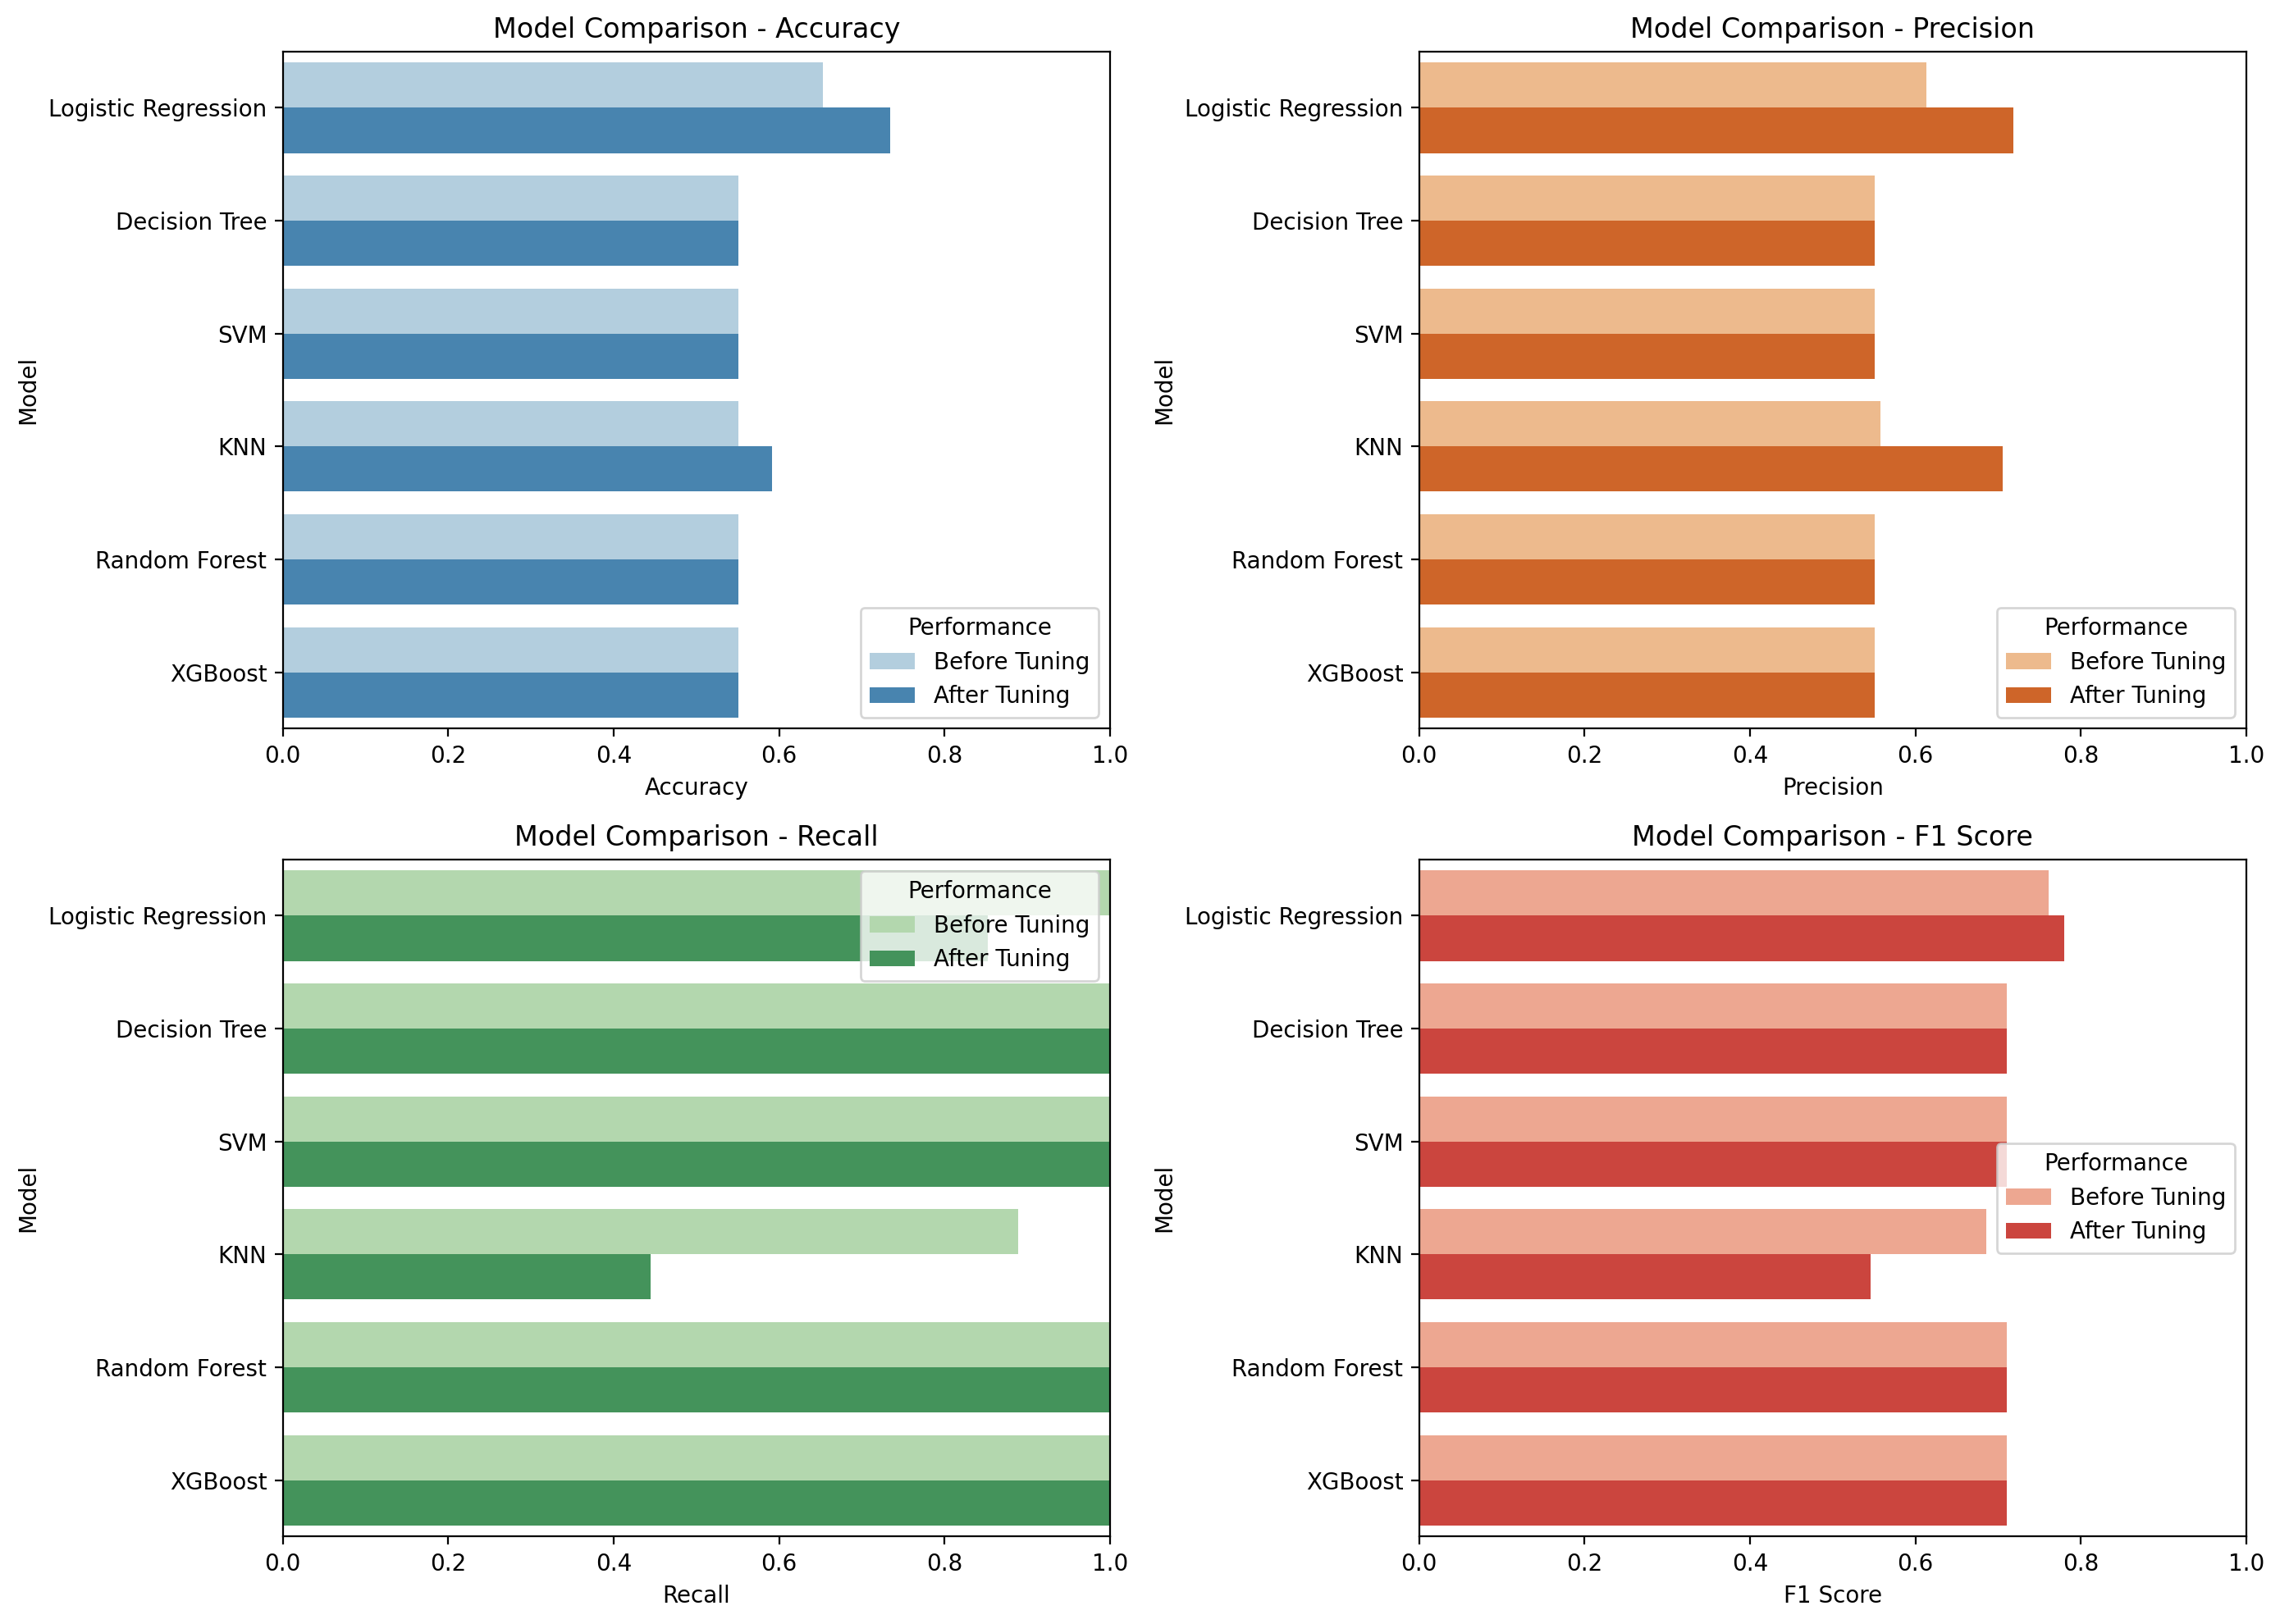

In [25]:
# (After tuning) Create a combined bar plot to compare the before-after performance of all models.

models = [logreg_grid.best_estimator_, tree_grid.best_estimator_, svm_grid.best_estimator_,
            knn_grid.best_estimator_, rf_grid.best_estimator_, xgb_grid.best_estimator_]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 'Random Forest', 'XGBoost']

accuracy_scores = [accuracy_score(y_test, model.predict(X_test)) for model in models]
precision_scores = [precision_score(y_test, model.predict(X_test)) for model in models]
recall_scores = [recall_score(y_test, model.predict(X_test)) for model in models]
f1_scores = [f1_score(y_test, model.predict(X_test)) for model in models]

model_comparison_after_tuning = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

display(model_comparison_after_tuning)

model_comparison_before_tuning['Performance'] = 'Before Tuning'
model_comparison_after_tuning['Performance'] = 'After Tuning'

combined_model_comparison = pd.concat([model_comparison_before_tuning, model_comparison_after_tuning])

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
sns.barplot(x='Accuracy', y='Model', hue='Performance', data=combined_model_comparison, ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title('Model Comparison - Accuracy')
axs[0, 0].set_xlabel('Accuracy')
axs[0, 0].set_xlim(0, 1)

# Precision
sns.barplot(x='Precision', y='Model', hue='Performance', data=combined_model_comparison, ax=axs[0, 1], palette='Oranges')
axs[0, 1].set_title('Model Comparison - Precision')
axs[0, 1].set_xlabel('Precision')
axs[0, 1].set_xlim(0, 1)

# Recall
sns.barplot(x='Recall', y='Model', hue='Performance', data=combined_model_comparison, ax=axs[1, 0], palette='Greens')
axs[1, 0].set_title('Model Comparison - Recall')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_xlim(0, 1)

# F1 Score
sns.barplot(x='F1 Score', y='Model', hue='Performance', data=combined_model_comparison, ax=axs[1, 1], palette='Reds')
axs[1, 1].set_title('Model Comparison - F1 Score')
axs[1, 1].set_xlabel('F1 Score')
axs[1, 1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

# TODO
~~Up/downsampling~~

~~Pipeline~~

~~Confusion matrix~~

~~Merge with Portugal data -> Train~~

~~Merge with El Nino -> Train~~

~~Portugal as test set~~